## Annual Averages

Let's now plot the annual averages. First, let's load our data.

In [2]:
import xarray as xarr

# open datafile
dataFile = "./data/clipped_hourly_single_1988.nc"
data = xarr.open_dataset(dataFile)

# Kelvin -> Celsius
data["t_celsius"] = data['t2m'] - 273.15

Now, we can calculate the mean in the form of a time series and as a heatmap across the United States.

In [3]:
# calculate averages across continental US
mean_temp = data['t_celsius'].mean(dim='valid_time')
mean_precipitation = data['tp'].mean(dim='valid_time')

# calculate nationwide average across the year
temp_timeseries = data['t_celsius'].mean(dim=['latitude', 'longitude'])
precipitation_timeseries = data['tp'].mean(dim=['latitude', 'longitude'])

Now, we can plot the data. Let's start with the heatmap across the United States.

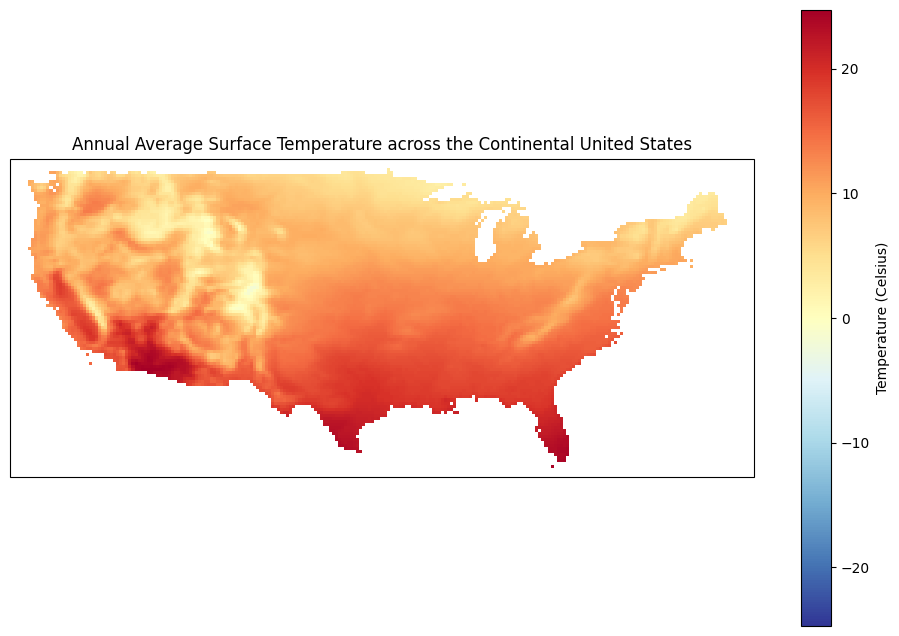

In [4]:
import matplotlib.pyplot as plot
import cartopy.crs as ccrs

# declare figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# make map, adjust colorbar
temp_plot = mean_temp.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", add_colorbar=True)
temp_plot.colorbar.set_label("Temperature (Celsius)")

# plot, show
plot.title("Annual Average Surface Temperature across the Continental United States")
plot.savefig("./plots/Annual_Average_Surface_Temperature_CONUS_1988.png")
plot.show()

Now, let's do the average precipitation.

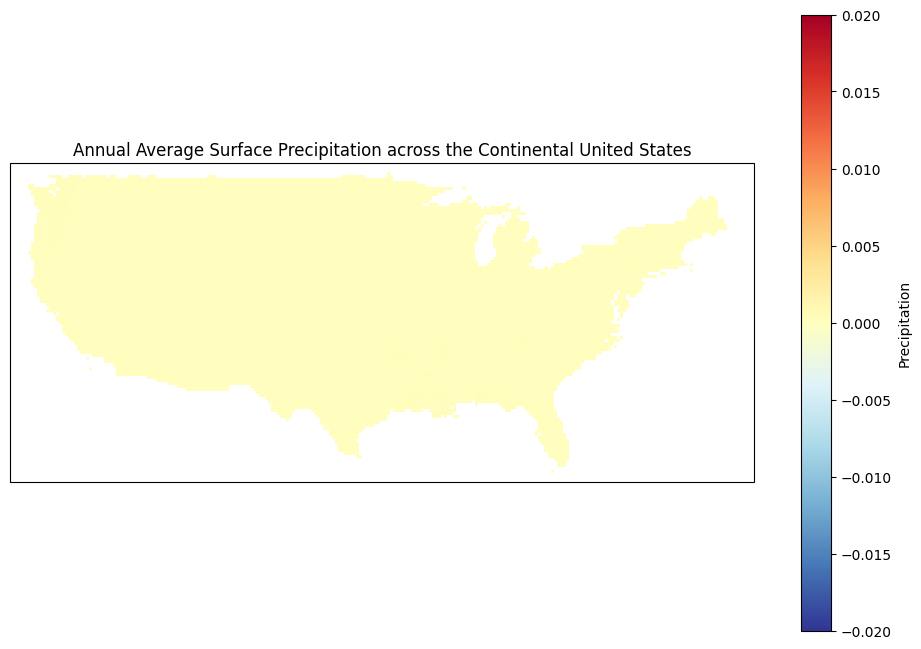

In [5]:
# declare figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# make map, adjust colorbar
precipitation_plot = mean_precipitation.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", vmin=-0.02, vmax=0.02, add_colorbar=True)
precipitation_plot.colorbar.set_label("Precipitation")

# plot, show
plot.title("Annual Average Surface Precipitation across the Continental United States")
plot.savefig("./plots/Annual_Average_Surface_Precipitation_CONUS_1988.png")
plot.show()

(The altitude at which the pressure is 1hPa is so extreme that there is essentially zero cloud water content; hence, the near-uniform graph.)

Let's now plot the annual average across the entire continental United States with a graph that shows how temperature changed with time.

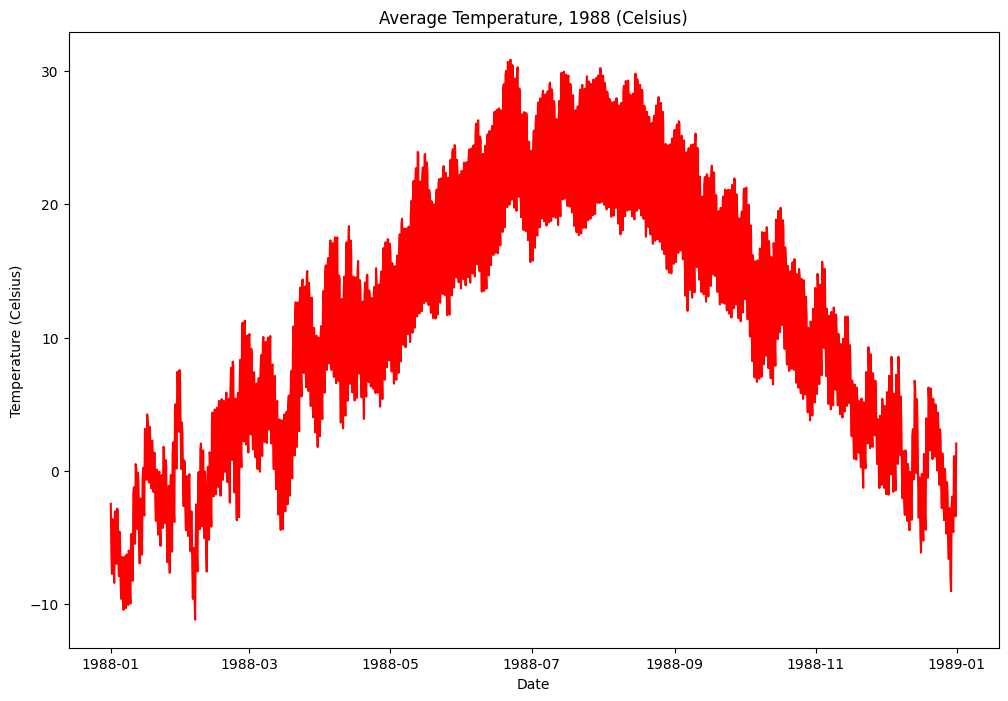

In [6]:
# create figure
theFigure = plot.subplots(figsize=(12,8))

# need to pass in the times, and then the data
plot.plot(temp_timeseries.valid_time, temp_timeseries, color="red")

# labels
plot.ylabel('Temperature (Celsius)')
plot.xlabel("Date")
plot.title("Average Temperature, 1988 (Celsius)")
plot.savefig("./plots/Annual_Average_Surface_Temp_TimeSeries_1988.png")
plot.show()

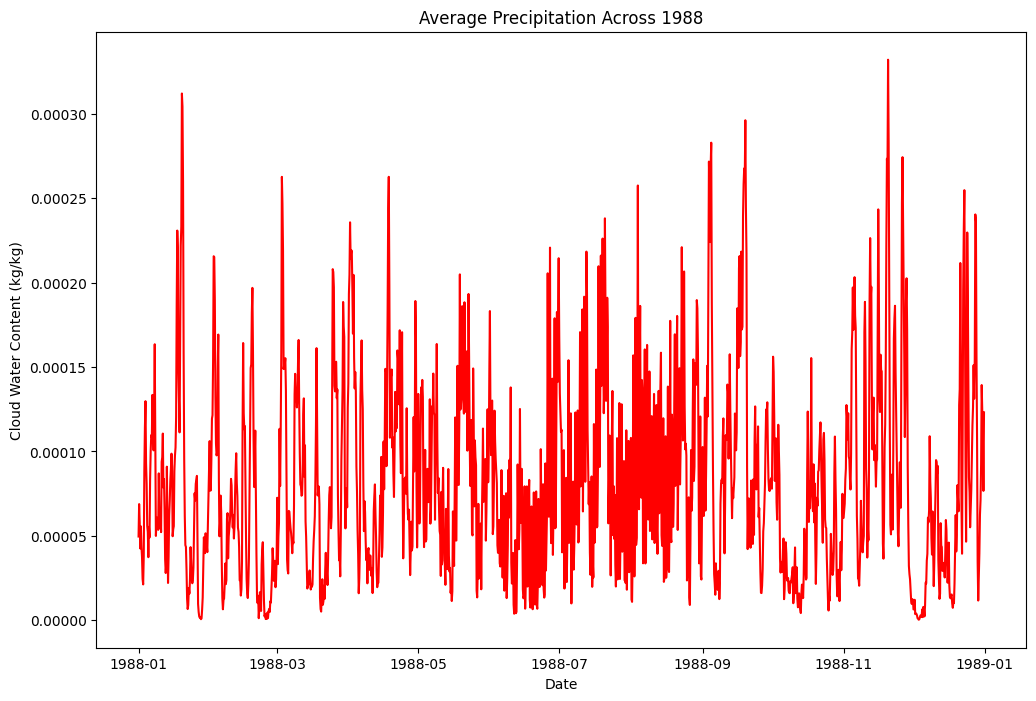

In [7]:
theFigure = plot.subplots(figsize=(12,8))
plot.plot(precipitation_timeseries.valid_time, precipitation_timeseries, color="red")

# labels
plot.ylabel("Cloud Water Content (kg/kg)")
plot.xlabel("Date")
plot.title("Average Precipitation Across 1988")
plot.savefig("./plots/Annual_Average_Surface_Precipitation_TimeSeries_1988.png")
plot.show()